# Visualization
* 대상지 주요 정보 정리(교통량, 속도, 차로변경 등)
* 시각화
    * 히스토그램 & 바이올린 플롯(집계적)

# Import

In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm
import warnings
import csv
import os

import math # arctangent; math.atan 사용 목적
import statistics

from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as po

import matplotlib.pyplot  as plt
import seaborn as sns

import pyarrow.parquet as pq

import seaborn as sns
from matplotlib.collections import LineCollection
from matplotlib.cm import ScalarMappable
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.ticker as ticker
import matplotlib.colors as colors
import matplotlib.patches as patches
import matplotlib as mpl

from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.text import Annotation

from SSM_base import points

from plotnine import *
from plotnine.data import *

import matplotlib.image as mpimg

# Load Dataset

In [2]:
working_dir = 'D:/OneDrive/Projects/2023_SSM_Feasibility'

# 이미지 폰트 깨지는거 해결

In [3]:
plt.rcParams['font.family'] = 'Times New Roman'

# 임계값

In [4]:
folder_name = 'Documents'
file_name = 'SSM_variables.xlsx'
sheet_name = 'threshold'

th0reshold_path = os.path.join(working_dir, folder_name, file_name)

threshold_list = np.array(pd.read_excel(threshold_path, sheet_name = sheet_name))

## SSM 계산된 .csv 자료 불러오기
* 합류구간 : `merging_type1_03frm_0.10sec.csv`

In [4]:
folder_name = 'Dataset/03_SSM'
file_list = ['LV_long_trajectories-0750am-0805am.parquet', 'LV_long_trajectories-0805am-0820am.parquet', 'LV_long_trajectories-0820am-0835am.parquet']

df_0 = pd.DataFrame()

file_path = os.path.join(working_dir, folder_name, file_list[0])
df_0 = pq.read_pandas(file_path).to_pandas()
    
# for file, i in tqdm(zip(file_list, range(len(file_list)))):
#     file_path = os.path.join(working_dir, folder_name, file)
#     df = pq.read_pandas(file_path).to_pandas()
#     df['veh_id'] = df['veh_id'].astype('int') + 10000*i
#     df['LV_ID'] = df['LV_ID'].astype('int') + 10000*i
    
#     df['veh_id'] = df['veh_id'].astype('str')
#     df['LV_ID'] = df['LV_ID'].astype('str')
    
#     df_0 = pd.concat([df_0, df])
    
df_0.reset_index(inplace = True, drop = True)

df_0.loc[df_0['T2'] == math.inf, 'T2'] = None
df_0.loc[df_0['ACT'] == math.inf, 'ACT'] = None
df_0.loc[df_0['MDRAC'] == math.inf, 'MDRAC'] = None
df_0.loc[df_0['pPET'] == math.inf, 'pPET'] = None
df_0.loc[df_0['time_gap'] == math.inf, 'time_gap'] = None

In [5]:
df_0

,veh_id,LV_ID,frm,LV_type,local_x,local_y,V_len,V_wid,velocity,acc,...,DCIA,unsafety,time_gap,TIT,TIT2,TGIT,TIACT,TIDSS,TIDRAC,TIMDRAC
0,6,4,141,LV0,153.250,0.602539,4.265625,1.493164,49.53125,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,4,142,LV0,154.625,0.705078,4.265625,1.493164,49.53125,0.0,...,NaN,-0.376354,116.815548,0.0,0.0,0.000000,NaN,0.01404,0.0,0.0
2,6,4,143,LV0,156.000,0.807617,4.265625,1.493164,49.53125,0.0,...,-1.685822,-2.725814,1.844194,NaN,NaN,0.115581,0.213941,NaN,0.0,NaN
3,6,4,144,LV0,157.375,0.910156,4.265625,1.493164,49.53125,0.0,...,-2.335037,-6.797494,2.443745,NaN,NaN,0.055625,0.000000,NaN,0.0,NaN
4,6,4,145,LV0,158.750,1.012695,4.265625,1.493164,49.53125,0.0,...,-2.393748,-9.975577,6.193121,NaN,0.0,0.000000,0.127937,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725517,2783,2757,8293,LVR,255.000,6.523438,5.335938,1.645508,0.00000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
2725518,2783,2757,8294,LVR,255.000,6.523438,5.335938,1.645508,0.00000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.078262,NaN,NaN,NaN
2725519,2783,2757,8295,LVR,255.000,6.523438,5.335938,1.645508,0.00000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.257185,NaN,NaN,NaN
2725520,2783,2757,8296,LVR,255.000,6.523438,5.335938,1.645508,0.00000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.225032,NaN,NaN,NaN


In [8]:
df_0.rename({'time_gap' : 'TimeGap', 'pPET':'TAdv'}, axis = 1, inplace = True)

In [9]:
df_0.loc[df_0['potential_conflict_type'] == 'angled', 'potential_conflict_type'] = 'side_swipe'

In [10]:
df_0['potential_conflict_type'].unique()

array([None, 'rear_end', 'side_swipe'], dtype=object)

In [11]:
var_list = ['velocity', 'acc']
SSM_list_1 = [ 'TTC', 'MTTC', 'T2', 'TAdv', 'TimeGap', 'ACT']
SSM_list_2 = ['PSD', 'DSS', 'MMTC', 'PICUD', 'MTC']
SSM_list_3 = ['DRAC', 'MDRAC', 'DCIA', 'unsafety']

SSM_list = SSM_list_1 + SSM_list_2 + SSM_list_3

print(len(SSM_list))

15


# 주요포인트

In [12]:
def make_cell(local_x):
    """
    Local X (m) 변수값에 따른 셀 번호 지정
        
    """
    
    if pd.isna(local_x) == False:
        cellnum = int(local_x//20 + 1) # 나머지는 버린다.
        cellnum = cellnum * 20
    
        if cellnum < 100:
            cell = '0' + str(cellnum)

        else: # cellnum >= 10인 경우
            cell = str(cellnum)    
            
    else:
        cell = None
        
    return cell

In [13]:
def df_to_plotly(pv):
    return {'z': pv.values.tolist(),
            'y': pv['lane'].tolist(),
            'x': pv.columns.tolist()}

In [14]:
palette_ryb = ['#00b0f0', '#ffff00', '#ff5050'] # 엇갈림구간 프로젝트의 그 삼색팔레트 : 파랑-노랑-빨강
palette_TIT = ['#ffffff', '#ff0000'] # 환색~빨강
#palette_bluewhite = ['#ffffff', '#0054ff'] # 
palette_TTC = ['#ff0000', '#ffffff'] # 빨강~흰색
#palette_whiteblue = ['#0054ff', '#ffffff']

# 기초통계량

In [46]:
df_0['TimeGap'].unique()

array([         nan, 116.8155476 ,   1.84419404, ...,   7.882767  ,
        41.34085198, 243.70479104])

In [49]:
for SSM in SSM_list:
    df_0[SSM] = df_0[SSM].astype('float16')

In [86]:
# 실수표현 코드
pd.options.display.float_format = '{:.2f}'.format


for df, i in tqdm(zip([df_0][:1], [0][:1])):
    
    total_mean = pd.DataFrame(df[SSM_list].mean()).rename({0 : '전체'}, axis = 1)
    sub_mean = pd.pivot_table(df, columns = ['potential_conflict_type'], values = SSM_list, aggfunc = 'mean') # 소계
    each_mean = pd.pivot_table(df, columns = ['potential_conflict_type', 'LC_CF'], values = SSM_list, aggfunc = 'mean')

    #each_mean.loc[:, ('angled', '전체')] = sub_mean['angled'].astype('float16')
    each_mean.loc[:, ('rear_end', '전체')] = sub_mean['rear_end'].astype('float16')
    each_mean.loc[:, ('side_swipe', '전체')] = sub_mean['side_swipe'].astype('float16')
    each_mean.loc[:, ('전체', '전체')] = total_mean

    total_mean = each_mean.stack().unstack().round(2)
    total_mean = total_mean[['rear_end', 'side_swipe', '전체']]
    
    total_mean.drop([('전체', 'CF'), ('전체', 'LC')], axis = 1, inplace = True)
    
    # 카운트
    
    total_test = pd.DataFrame(df[['veh_id']].count()).rename({0 : '전체'}, axis = 1)
    sub_test = pd.pivot_table(df, columns = ['potential_conflict_type'], values = ['veh_id', 'velocity', 'acc'], aggfunc = {'veh_id' : 'count', 'velocity' : 'mean', 'acc' : 'mean'})
    each_test = pd.pivot_table(df, columns = ['potential_conflict_type', 'LC_CF'], values = ['veh_id', 'velocity', 'acc'], aggfunc = {'veh_id' : 'count', 'velocity' : 'mean', 'acc' : 'mean'})

    #each_test.loc[:, ('angled', '전체')] = sub_test['angled'].astype('float16')
    each_test.loc[:, ('rear_end', '전체')] = sub_test['rear_end'].astype('float16')
    each_test.loc[:, ('side_swipe', '전체')] = sub_test['side_swipe'].astype('float16')
    each_test.loc[:, ('전체', '전체')] = total_test

    total_test = each_test.stack().unstack().round(2)
    #total_test = total_test[['rear_end', 'side_swipe', 'angled', '전체']]

    total_test.drop([('전체', 'CF'), ('전체', 'LC')], axis = 1, inplace = True)
    
    total_mean = pd.concat([total_test, total_mean])
    total_mean = total_mean.round(2)
    total_mean = total_mean.astype('float').round(2).fillna('-')
    
    total_mean = total_mean.reindex(['veh_id', 'velocity', 'acc'] + SSM_list_1 + SSM_list_2 + SSM_list_3)
    
    globals()[f'total_mean_{i}'] = total_mean

1it [00:02,  2.24s/it]


In [87]:
total_mean_0

potential_conflict_type      rear_end                     side_swipe           \
LC_CF                              CF          LC      전체         CF       LC   
veh_id                     1138722.00   228944.00     inf  255740.00 51388.00   
velocity                        43.25       44.42   43.44      47.66    47.11   
acc                              0.02        0.03    0.03       0.01     0.02   
TTC                            129.73      105.33  125.69          -        -   
MTTC                            11.40       10.61   11.27          -        -   
T2                              39.49       33.41   38.47      12.59    11.36   
TAdv                           586.27      520.79  575.50     159.43   141.96   
TimeGap                       1869.85     1784.27 1855.00     835.21   656.42   
ACT                     1451297012.94 90788933.42     inf      79.25    56.96   
PSD                             70.50      111.07   76.94          -        -   
DSS                              7.80        7.92    7.82          -        -   
MMTC                             2.48        2.39    2.47          -        -   
PICUD                           14.99       14.47   14.91          -        -   
MTC                              2.05        2.01    2.04          -        -   
DRAC                             0.07        0.11    0.07          -        -   
MDRAC                            0.10        0.18    0.12          -        -   
DCIA                             0.28        0.28    0.28          -        -   
unsafety                        -0.55       -0.73   -0.58          -        -   

potential_conflict_type                    전체  
LC_CF                       전체             전체  
veh_id                     inf     2725522.00  
velocity                 47.56              -  
acc                       0.01              -  
TTC                          -         125.70  
MTTC                         -          11.27  
T2                       12.39          30.45  
TAdv                    156.50         498.46  
TimeGap                 805.50        1662.83  
ACT                      75.50 26236163821.14  
PSD                          -          76.94  
DSS                          -           7.81  
MMTC                         -           2.47  
PICUD                        -          14.91  
MTC                          -           2.04  
DRAC                         -           0.07  
MDRAC                        -           0.12  
DCIA                         -           0.28  
unsafety                     -          -0.58

In [78]:
df[(df['potential_conflict_type'] == 'rear_end') & (df['LC_CF'] == 'CF')]['TAdv']

33        0.47
34        0.69
35        0.80
36        1.09
37        0.86
          ... 
2724710   0.00
2724711   0.44
2724712   0.22
2724717   1.16
2724719   0.88
Name: TAdv, Length: 1138722, dtype: float16

In [88]:
for df, i in tqdm(zip([df_0], [0])):
    
    total_mean = pd.DataFrame(df[SSM_list].std()).rename({0 : '전체'}, axis = 1)
    sub_mean = pd.pivot_table(df, columns = ['potential_conflict_type'], values = SSM_list, aggfunc = np.std) # 소계
    each_mean = pd.pivot_table(df, columns = ['potential_conflict_type', 'LC_CF'], values = SSM_list, aggfunc = np.std)

    #each_mean.loc[:, ('angled', '전체')] = sub_mean['angled'].astype('float16')
    each_mean.loc[:, ('rear_end', '전체')] = sub_mean['rear_end'].astype('float16')
    each_mean.loc[:, ('side_swipe', '전체')] = sub_mean['side_swipe'].astype('float16')
    each_mean.loc[:, ('전체', '전체')] = total_mean

    total_mean = each_mean.stack().unstack().round(2)
    total_mean = total_mean[['rear_end', 'side_swipe', '전체']]
    
    total_mean.drop([('전체', 'CF'), ('전체', 'LC')], axis = 1, inplace = True)
    
    # 카운트
    
    total_test = pd.DataFrame(df[['veh_id']].count()).rename({0 : '전체'}, axis = 1)
    sub_test = pd.pivot_table(df, columns = ['potential_conflict_type'], values = ['veh_id', 'velocity', 'acc'], aggfunc = {'veh_id' : 'count', 'velocity' : np.std, 'acc' : np.std})
    each_test = pd.pivot_table(df, columns = ['potential_conflict_type', 'LC_CF'], values = ['veh_id', 'velocity', 'acc'], aggfunc = {'veh_id' : 'count', 'velocity' : np.std, 'acc' : np.std})

    #each_test.loc[:, ('angled', '전체')] = sub_test['angled'].astype('float16')
    each_test.loc[:, ('rear_end', '전체')] = sub_test['rear_end'].astype('float16')
    each_test.loc[:, ('side_swipe', '전체')] = sub_test['side_swipe'].astype('float16')
    each_test.loc[:, ('전체', '전체')] = total_test

    total_test = each_test.stack().unstack().round(2)
    #total_test = total_test[['rear_end', 'side_swipe', 'angled', '전체']]

    total_test.drop([('전체', 'CF'), ('전체', 'LC')], axis = 1, inplace = True)
    
    total_mean = pd.concat([total_test, total_mean])
    total_mean = total_mean.round(2)
    total_mean = total_mean.astype('float').round(2).fillna('-')
    
    total_mean = total_mean.reindex(['veh_id', 'velocity', 'acc'] + SSM_list_1 + SSM_list_2 + SSM_list_3)
    
    globals()[f'total_mean_{i}'] = total_mean

1it [00:02,  2.31s/it]


In [89]:
total_mean_0

potential_conflict_type         rear_end                         side_swipe  \
LC_CF                                 CF             LC       전체         CF   
veh_id                        1138722.00      228944.00      inf  255740.00   
velocity                           14.11          13.21    13.97      13.26   
acc                                 0.47           0.49     0.48       0.48   
TTC                               414.61         369.51   407.50          -   
MTTC                               78.89          77.95    78.75          -   
T2                                191.23         178.23   189.12      72.36   
TAdv                           194238.13       45373.64      inf    6021.37   
TimeGap                        299153.05      149281.29      inf   24342.36   
ACT                     1543458644430.90 43293981714.79      inf   16678.78   
PSD                             14601.83       22053.25 16016.00          -   
DSS                                12.42          16.28    13.09          -   
MMTC                               13.54          17.68    14.27          -   
PICUD                              15.47          21.32    16.53          -   
MTC                                20.44          48.70    26.98          -   
DRAC                                9.37           1.57     8.62          -   
MDRAC                               1.32           2.10     1.48          -   
DCIA                               39.27          35.43    38.69          -   
unsafety                           27.79          48.26    31.92          -   

potential_conflict_type                                  전체  
LC_CF                         LC       전체                전체  
veh_id                  51388.00      inf        2725522.00  
velocity                   12.95    13.21                 -  
acc                         0.49     0.48                 -  
TTC                            -        -            407.61  
MTTC                           -        -             78.74  
T2                         58.56    70.31            161.54  
TAdv                     5938.62  6008.00         161012.74  
TimeGap                 12432.51 22784.00         252902.19  
ACT                      3879.60 15304.00 13999365474581.84  
PSD                            -        -          16017.27  
DSS                            -        -             13.10  
MMTC                           -        -             14.28  
PICUD                          -        -             16.54  
MTC                            -        -             26.98  
DRAC                           -        -              8.62  
MDRAC                          -        -              1.48  
DCIA                           -        -             38.68  
unsafety                       -        -             31.93

# 히트맵 또는 산점도

added!
added!
added!
added!
added!
added!


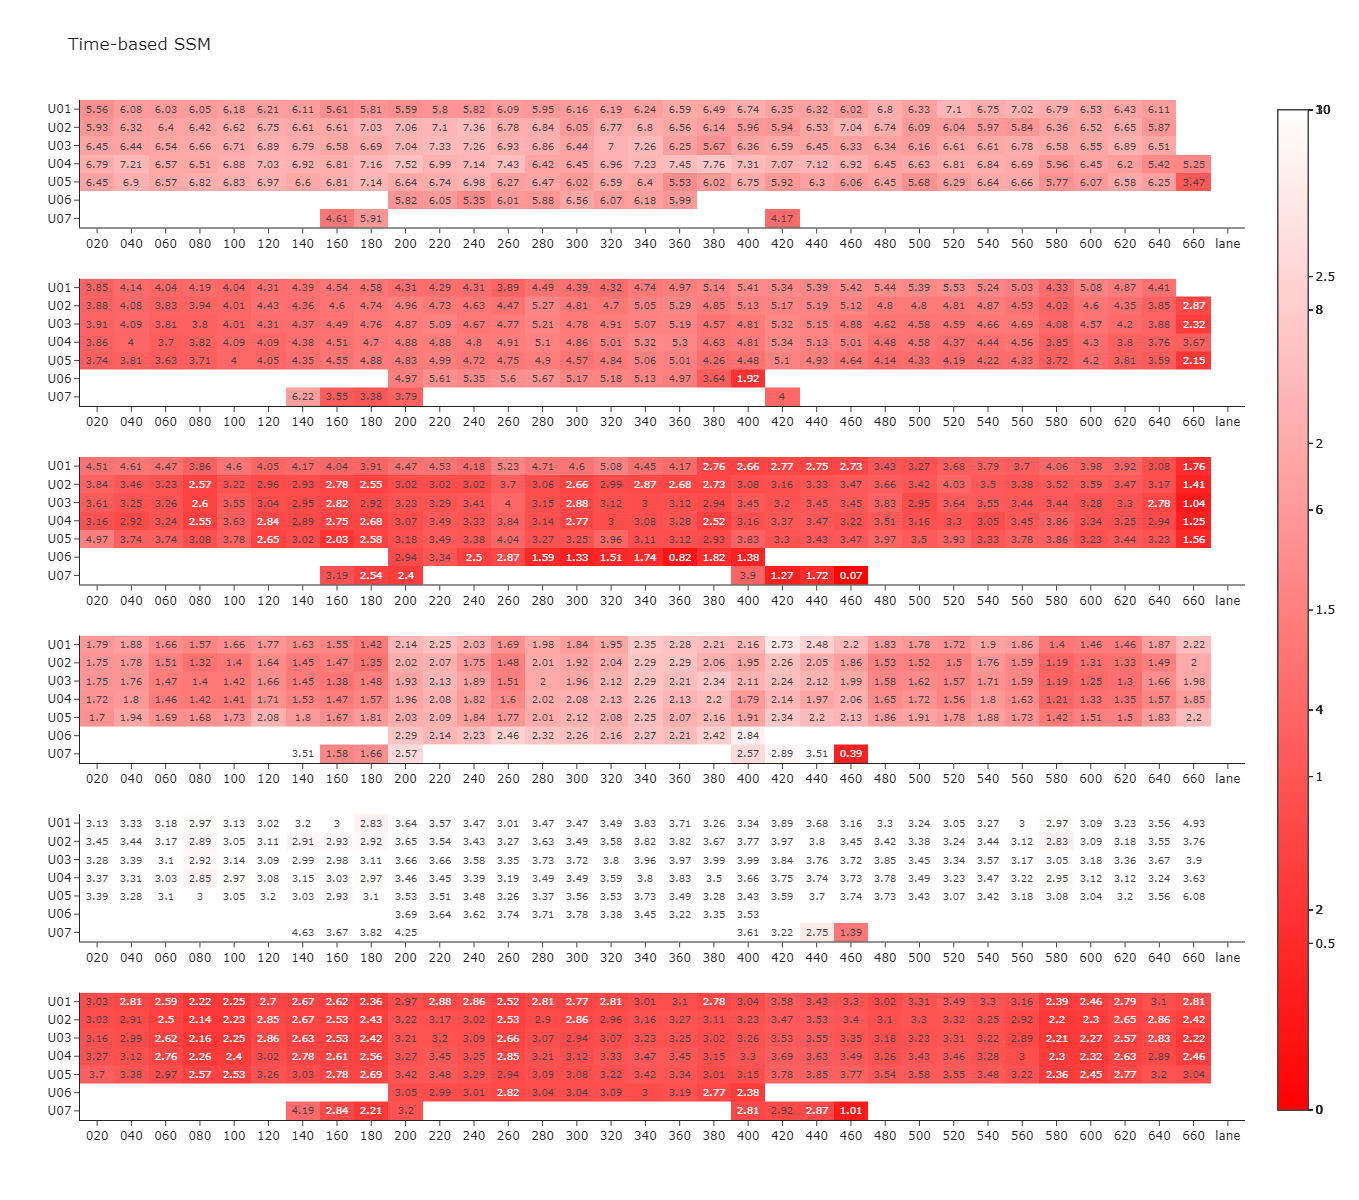

added!
added!
added!
added!
added!


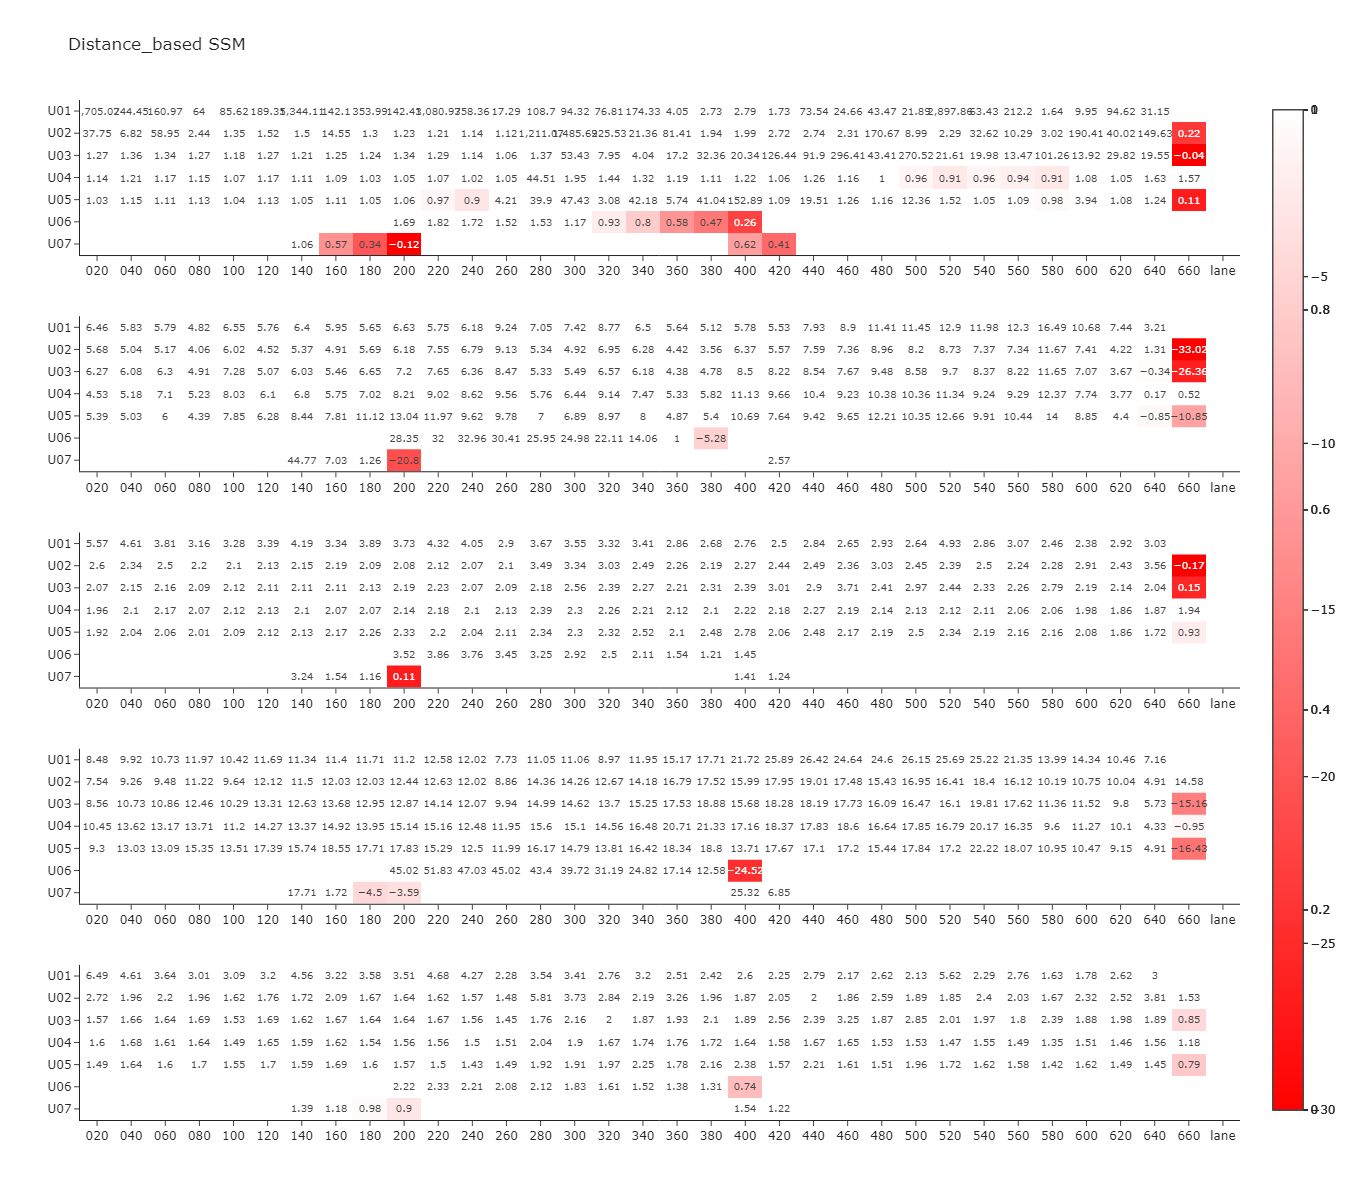

added!
added!
added!
added!


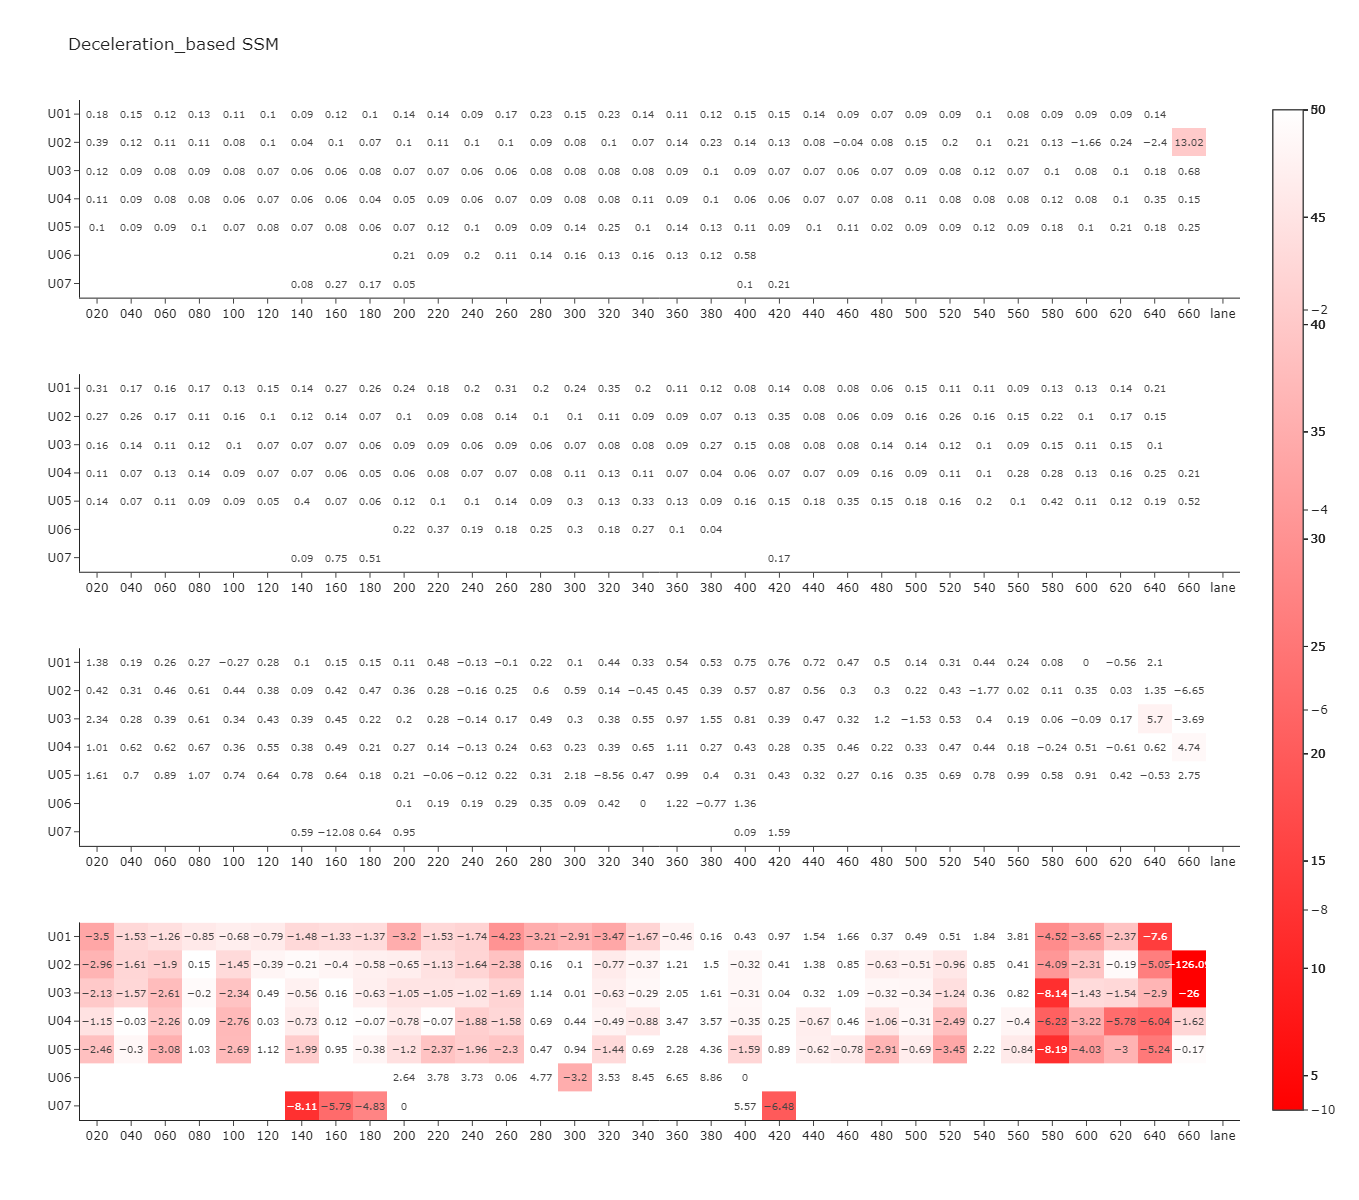

In [131]:
df = df_0.copy()

df['cell'] = df['local_x'].apply(make_cell)
# 셀별 차로변경 횟수(Leave) : 이는 sum으로 구하면 된다.
cell_list = df['cell'].unique()
cell_list.sort()
cell_list = list(cell_list)


for target_SSM_list, name in zip([SSM_list_1, SSM_list_2, SSM_list_3], ['Time-based SSM', 'Distance_based SSM', 'Deceleration_based SSM']):
    
    fig = make_subplots(rows = len(target_SSM_list), cols = 1)

    for SSM, i in zip(target_SSM_list, range(1, len(target_SSM_list)+1)):

        if name == 'Time-based SSM':
            sec = df[(df[SSM] <= 10)]

        else:
            pass
        
#         V_df = sec[['local_x', 'lane', SSM]]
#         LV_df = sec[['LV_local_x', 'LV_lane', SSM]]
#         LV_df.rename({'LV_local_x' : 'local_x', 'LV_lane' : 'lane'}, axis = 1, inplace = True)
#         VLV_df = pd.concat([V_df, LV_df])
#         VLV_df.reset_index(inplace = True, drop = True)

#         VLV_df['cell'] = VLV_df['local_x'].apply(make_cell)

        if len(sec) > 0:

            pv_veh = pd.pivot_table(sec,
                       index = 'lane',
                        columns = 'cell',
                        values = [SSM],
                        aggfunc = {SSM : 'mean'})

            if len(pv_veh) > 0:

                pv_veh = pv_veh[SSM]

                for cell in cell_list:
                    if cell not in pv_veh.columns:
                        pv_veh[cell] = np.NaN # 만약 셀이 없으면 추가해야 한다.

                    else:
                        pass

                pv_veh.reset_index(inplace = True)
                # 컬럼을 셀 번호 이름대로 정렬해준다. 이때 절때 Heatmap의 Categoryascending을 해 주면 안된다는 것이다.
                pv_veh2 = pv_veh[cell_list + ['lane']]
                #print(pv_veh2)

                if SSM in ['TTC', 'T2', 'ACT', 'MTTC']:
                    ax = go.Heatmap(df_to_plotly(pv_veh2.round(2)),
                                colorscale = palette_TTC,
                                texttemplate = '%{z}',
                                textfont = {'size' : 10},
                                showlegend = False,
                                zmin = 0, zmax = 10
                                )
                    
                elif SSM in ['TAdv', 'TimeGap']:
                    ax = go.Heatmap(df_to_plotly(pv_veh2.round(2)),
                                colorscale = palette_TTC,
                                texttemplate = '%{z}',
                                textfont = {'size' : 10},
                                showlegend = False,
                                zmin = 0, zmax = 3
                                )

                elif SSM in ['PSD', 'MTC', 'MMTC']: # 값이 낮을수록 위험
                    ax = go.Heatmap(df_to_plotly(pv_veh2.round(2)),
                                    colorscale = palette_TTC,
                                    texttemplate = '%{z}',
                                    textfont = {'size' : 10},
                                    showlegend = False,
                                    zmin = 0, zmax = 1
                                                        )

                elif SSM in ['DSS', 'PICUD']:
                    ax = go.Heatmap(df_to_plotly(pv_veh2.round(2)),
                                    colorscale = palette_TTC,
                                    texttemplate = '%{z}',
                                    textfont = {'size' : 10},
                                    showlegend = False,
                                    zmin = -30, zmax = 0
                                                        )

                elif SSM in ['DRAC', 'MDRAC', 'DCIA']:
                    ax = go.Heatmap(df_to_plotly(pv_veh2.round(2)),
                                    colorscale = palette_TIT,
                                    texttemplate = '%{z}',
                                    textfont = {'size' : 10},
                                    showlegend = False,
                                    zmin = 3.4, zmax = 50
                                                        )

                elif SSM in ['unsafety']:
                    ax = go.Heatmap(df_to_plotly(pv_veh2.round(2)),
                                    colorscale = palette_TTC,
                                    texttemplate = '%{z}',
                                    textfont = {'size' : 10},
                                    showlegend = False,
                                    zmax = 0, zmin = -10
                                                        )

                else:
                    print(SSM, 'What')

                fig.add_trace(ax, i, 1) # i행 j열에 추가
                print('added!')

            else:
                pass

    fig.update_xaxes(matches = 'x')
    fig.update_yaxes(matches = 'y')

    fig.update_layout(yaxis = dict(autorange = 'reversed'), 
              height = 1200, width = 1200,
              template = 'simple_white',
                     title_text = f'{name}')

    fig.update(layout_showlegend = False)

    fig.show()

## 바이올린

6it [00:27,  4.59s/it]


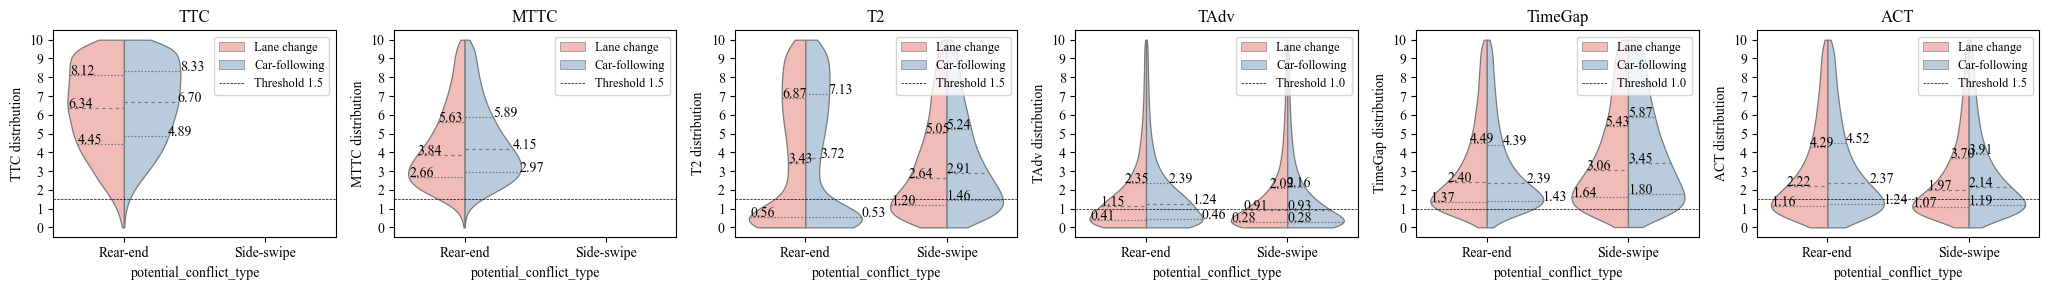

5it [00:27,  5.41s/it]


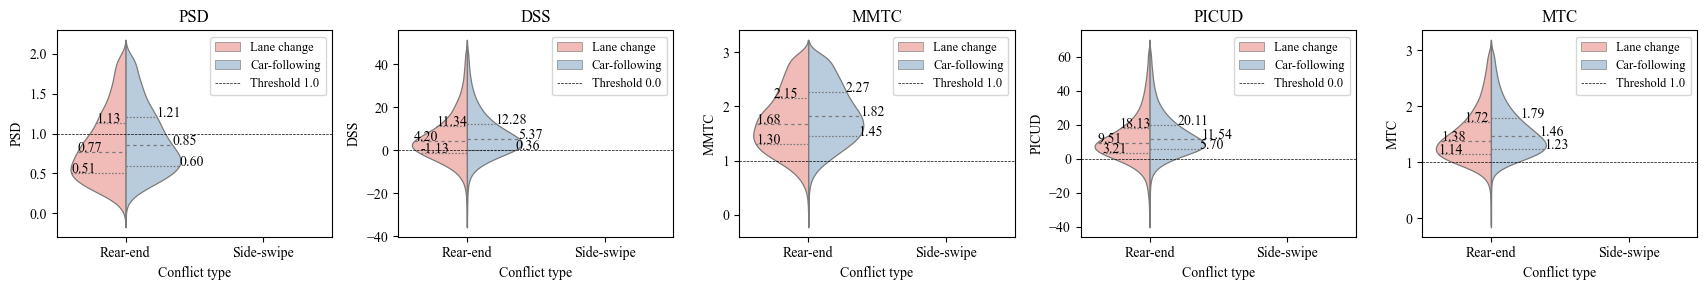

4it [00:19,  4.91s/it]


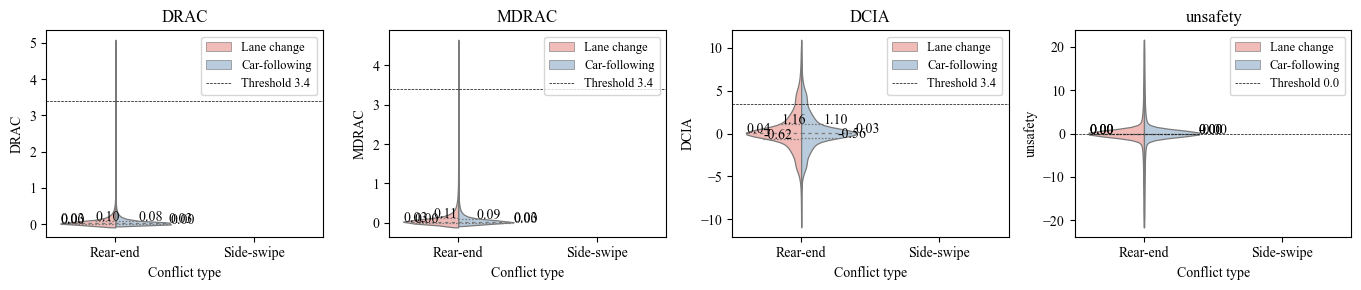

In [91]:
title_list = ['Time-based SSM', 'Distance-based SSM', 'Deceleration-based SSM']

for target_SSM_list, title in zip([SSM_list_1, SSM_list_2, SSM_list_3], title_list):
    
    target_len = 6#len(target_SSM_list)
    
    fig = plt.figure(figsize = (4 * target_len, 3))

    for SSM, i in tqdm(zip(target_SSM_list, range(target_len))):

        fig.add_subplot(1, target_len+1, i+1)
        
        # 임계값 불러오기
        tdx = np.where(threshold_list == SSM)[0][0]
        threshold = threshold_list[tdx][1]


        if SSM in SSM_list_1:
            tdf = df_0[(df_0[SSM] <= 10) & (df_0[SSM] >= 0)].dropna(subset = SSM).copy()

        else:
            upper_bound = df_0[SSM].mean() + df_0[SSM].std() * 3
            lower_bound = df_0[SSM].mean() - df_0[SSM].std() * 3
            
            tdf = df_0[(df_0[SSM] >= lower_bound) & (df_0[SSM] <= upper_bound)].dropna(subset = SSM).copy()
            
        sec = pd.DataFrame({'potential_conflict_type' : ['rear_end', 'side_swipe', 'angled']})
        tdf = pd.concat([tdf, sec])

        tdf['potential_conflict_type'] = tdf['potential_conflict_type'].map({'rear_end': 'Rear-end', 'side_swipe' : 'Side-swipe'})
        tdf['Behavior'] = tdf['LC_CF'].map({'CF': 'Car-following', 'LC' : 'Lane change'})


        if SSM in SSM_list_1:
            
            sec = pd.DataFrame({'potential_conflict_type' : ['Rear-end', 'Side-swipe']})
            tdf = pd.concat([tdf, sec])
            tdf = tdf.sort_values(by = 'LC_CF', ascending = False)

            ax = sns.violinplot(
                data = tdf,
                x = 'potential_conflict_type', y = SSM,
                hue = 'Behavior',
                bw = 0.2,
                linewidth = 0.9,
                scale = 'width',
                split = True,
                palette = "Pastel1",
                cut = 0, inner = 'quart',
                order = ['Rear-end', 'Side-swipe']
            )
            # 플롯에 텍스트 달기
            
            for l in ax.lines:
                ax.text(l.get_data()[0][l.get_data()[0].nonzero()][0], l.get_data()[1][0], f'{l.get_data()[1][0]:.2f}')

        elif SSM in SSM_list_2:
            
            temp_dict = {'PSD' : [0, 2], 'DSS' : [-100, 150], 'PICUD' : [-150, 200], 'MTC' : [0, 3], 'MMTC' : [0, 3]}
            
            tdf = tdf[(tdf[SSM] >= temp_dict[SSM][0]) & (tdf[SSM] <= temp_dict[SSM][1])]

            sec = pd.DataFrame({'potential_conflict_type' : ['Rear-end', 'Side-swipe']})
            tdf = pd.concat([tdf, sec])
            tdf = tdf.sort_values(by = 'LC_CF', ascending = False)
            
            # ax = sns.histplot(
            #     data = tdf,
            #     y = SSM,
            #     hue = 'Behavior', 
            #     #stat = 'density',
            #     kde = True, bins = 50,
            #     linewidth = 0.5, edgecolor = 'white',
            #     palette = "Pastel1",
            #     line_kws = {'linewidth' : 1.5}
            # )
            ax = sns.violinplot(
                data = tdf,
                x = 'potential_conflict_type', y = SSM,
                hue = 'Behavior',
                bw = 0.2,
                linewidth = 0.9,
                scale = 'width',
                split = True,
                palette = "Pastel1",
                inner = 'quart',
                order = ['Rear-end', 'Side-swipe']
            )
            
            # 플롯에 텍스트 달기
            
            for l in ax.lines:
                ax.text(l.get_data()[0][l.get_data()[0].nonzero()][0], l.get_data()[1][0], f'{l.get_data()[1][0]:.2f}')
            
        else:
            temp_dict = {'DRAC' : [0, 5], 'MDRAC' : [0, 5], 'DCIA' : [-10, 10], 'unsafety' : [-20, 20]}
            
            tdf = tdf[(tdf[SSM] >= temp_dict[SSM][0]) & (tdf[SSM] <= temp_dict[SSM][1])]
            
            sec = pd.DataFrame({'potential_conflict_type' : ['Rear-end', 'Side-swipe']})
            tdf = pd.concat([tdf, sec])
            tdf = tdf.sort_values(by = 'LC_CF', ascending = False)

            ax = sns.violinplot(
                data = tdf,
                x = 'potential_conflict_type', y = SSM,
                hue = 'Behavior',
                bw = 0.2,
                linewidth = 0.9,
                scale = 'width',
                split = True,
                palette = "Pastel1",
                inner = 'quart',
                order = ['Rear-end', 'Side-swipe']
            )
            # ax = sns.histplot(
            #     data = tdf,
            #     y = SSM,
            #     hue = 'Behavior', 
            #     #stat = 'density',
            #     kde = True, bins = 50,
            #     linewidth = 0.5, edgecolor = 'white',
            #     palette = "Pastel1",
            #     line_kws = {'linewidth' : 1.5})
                
            #ax.set_ylim([temp_dict[SSM][0], temp_dict[SSM][1]])
            # 플롯에 텍스트 달기
            
            for l in ax.lines:
                ax.text(l.get_data()[0][l.get_data()[0].nonzero()][0], l.get_data()[1][0], f'{l.get_data()[1][0]:.2f}')

        # 임계값을 설정해 주기
        plt.axhline(y = threshold, color = 'black', linestyle = '--', linewidth = 0.5, label = f'Threshold {threshold}')

        #ax.legend_.remove()

        # Add title and labels
        plt.title(f'{SSM}')

        if SSM in SSM_list_1:
            plt.yticks(np.arange(0, 11))
            
            plt.ylabel(f'{SSM} distribution')
            plt.legend(fontsize = 9)
            
        else:
            #ax.set_yscale('log')
            #plt.yscale('symlog')
            plt.xlabel('Conflict type')
            plt.ylabel(f'{SSM}')
            plt.legend(fontsize = 9, loc = 'upper right')


    fig.tight_layout()

    ## ----------------------------------------------------------------------
    #이미지 저장하기

    save_file = f'violin_weaving_{title}.png'
    save_folder = 'Dataset/04_graph'
    save_path = os.path.join(working_dir, save_folder, save_file)

    plt.savefig(save_path, dpi = 300)
    
    plt.show()

In [73]:
kur = pd.DataFrame(df_0[SSM_list].kurt()).rename({0 : 'Kurtosis'}, axis = 1)
kur['Skewness'] = pd.DataFrame(df_0[SSM_list].skew()).rename({0 : 'Skewness'}, axis = 1)['Skewness']
kur = kur.round(2)
kur

,Kurtosis,Skewness
TTC,71.72,7.04
MTTC,2037.09,39.52
T2,237.13,13.31
pPET,1467216.96,1183.06
ACT,2632513.80,1615.09
PSD,150299.82,367.57
DSS,26.68,1.65
PICUD,24.37,2.82
MTC,186911.58,354.57
MMTC,49836.41,189.12


# 문제차량 SSM 2-Dimensional Profile 조회

In [162]:
df_0[['Lane_record', 'LV_Lane_record']].drop_duplicates().head(10)

,Lane_record,LV_Lane_record
0,U07_U06_U05_U06_U05,U07_U06_U05
282,U04,U04
713,U01,U02_U01
956,U01,U01
1380,U02,U02_U01
1565,U05,U07_U06_U05
1607,U05,U07_U06_U05_U06_U05
1880,U05_U06_U08,U05
2039,U05_U06_U08,U07_U06_U05_U06_U05
2060,U03,U03


In [21]:
df[(df['Lane_record'] == 'U07_U06_U05_U04') & (df['LV_Lane_record'] == 'U05_U06_U08')].drop_duplicates(subset = ['veh_id', 'LV_ID']).sort_values(by = ['veh_id'])[['veh_id', 'LV_ID', 'LV_type']]

,veh_id,LV_ID,LV_type
1834410,128,74,LVR
30308,128,90,LV0
440295,1428,1425,LV0
497887,1583,1582,LV0
1440748,1704,1706,LVL
644635,1958,1932,LV0
659583,1991,1974,LV0
662602,2000,1974,LV0
2431669,2039,1974,LVR
2450700,2099,2107,LVR


In [54]:
df[df['veh_id'] == '1900'][['LV_ID', 'LV_type']].drop_duplicates().sort_values(by = 'LV_ID')

,LV_ID,LV_type
1496731,1867,LVL
1496557,1870,LVL
1496564,1875,LVL
1496503,1877,LVL
1496481,1881,LVL
1496527,1882,LVL
620303,1885,LV0
2386017,1887,LVR
1496634,1888,LVL
620657,1888,LV0


## Time-based

3it [00:04,  1.61s/it]


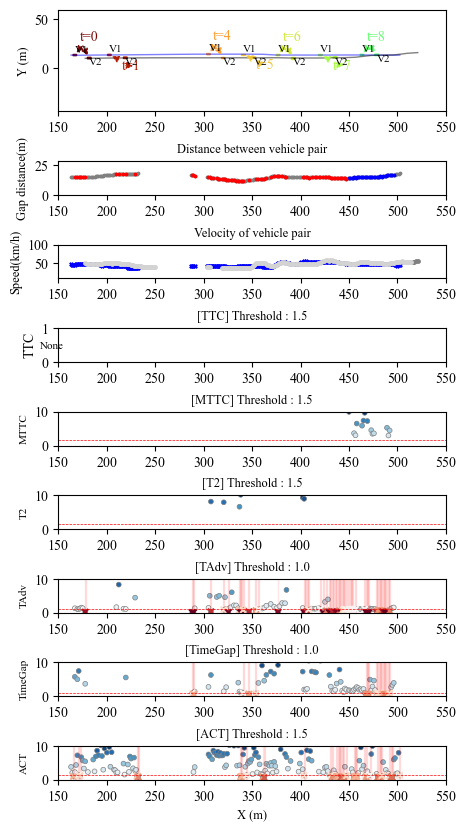

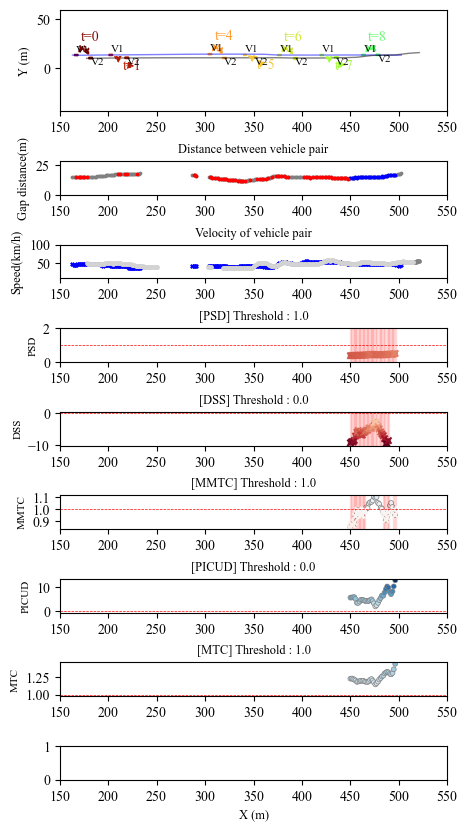

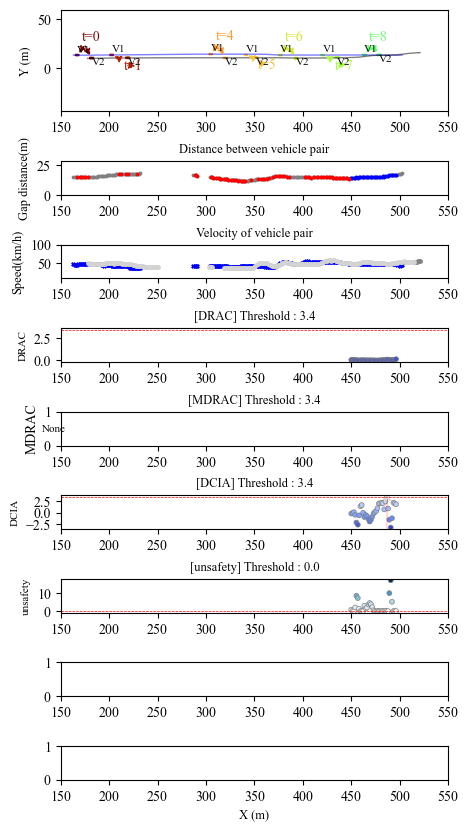

In [56]:
df = df_0
scatter_size = 12

Vehicle_ID, LV_ID = '1900', '1888'
x_min, x_max = 150, 550

# Vehicle_ID, LV_ID = '1428', '1425'
# x_min, x_max = 200, 400

# Vehicle_ID, LV_ID = '714', '710'
# x_min, x_max = 200, 600

# Vehicle_ID, LV_ID = '63', '62'
# x_min, x_max = 200, 600

for target_SSM_list, title in tqdm(zip([SSM_list_1, SSM_list_2, SSM_list_3], ['Time-based SSM', 'Distance-based SSM', 'Deceleration-based SSM'])):
    
    fig = plt.figure(figsize = (5, 10))
    row_num = len(SSM_list_1)+3

    if target_SSM_list != SSM_list_3:

        gs = fig.add_gridspec(row_num, 1, height_ratios = (3, 1, 1, 1, 1, 1, 1, 1, 1), hspace = 1.2) # 5행 1열의 그리드 생성

    else:
        gs = fig.add_gridspec(row_num, 1, height_ratios = (3, 1, 1, 1, 1, 1, 1, 1, 1), hspace = 1.2) # 5행 1열의 그리드 생성

    # 대상 차량 쌍을 필터링하여, 프레임별로 정렬하기
    sec1 = df[(df['veh_id'] == Vehicle_ID) & (df['LV_ID'] == LV_ID)]
    sec2 = df[(df['veh_id'] == LV_ID) & (df['LV_ID'] == Vehicle_ID)]

    # TV, LV가 역전된 sec2 DF의 경우, 컬럼이름을 바꾸어주어야 한다.
    col_list = ['local_x', 'local_y', 'velocity', 'acc', 'lane', 'Time', 'local_x_before',
           'local_y_before', 'delta_local_x', 'delta_local_y', 'velocity_x',
           'velocity_y', 'velocity_x_before', 'velocity_y_before',
           'delta_velocity_x', 'delta_velocity_y', 'acc_x', 'acc_y', 'lane_past',
           'Lane_record', 'Lane_record_split', 'Lane_00', 'Lane_99', 'Lane_change',
           'Lane_leave', 'Lane_change_direction']

    for col in col_list:
        sec2.rename({col:f'LV2_{col}'}, axis = 1, inplace = True)
        sec2.rename({f'LV_{col}' : col}, axis = 1, inplace = True)
        sec2.rename({f'LV2_{col}':f'LV_{col}'}, axis = 1, inplace = True)

    sec2.rename({'V_len' : 'LV_len', 'V_wid' : 'LV_wid', 'LV_wid' : 'V_wid', 'LV_len' : 'V_len'}, axis = 1, inplace = True)

    sample = pd.concat([sec1, sec2])
    sample = sample.sort_values(by = ['frm']).drop_duplicates(['frm'])
    sample = sample.reset_index(drop = True)

    ## 대상차량 궤적 표시
    V_x = np.array(sample['local_x'])
    V_y = np.array(sample['local_y'])
    V_time = np.array(sample['Time'])

    V_vx = np.array(sample['velocity_x'])
    V_vy = np.array(sample['velocity_y'])
    
    test = px.colors.sequential.Turbo[::-1]
    gradient_list = np.array(test)

    ## 선행차량 궤적 표시
    LV_x = np.array(sample['LV_local_x'])
    LV_y = np.array(sample['LV_local_y'])

    LV_vx = np.array(sample['LV_velocity_x'])
    LV_vy = np.array(sample['LV_velocity_y'])


    # 차량 사이즈
    V_len = sample[sample['veh_id'] == Vehicle_ID]['V_len'].iloc[0]
    V_wid = sample[sample['veh_id'] == Vehicle_ID]['V_wid'].iloc[0]
    LV_len = sample[sample['LV_ID'] == LV_ID]['LV_len'].iloc[0]
    LV_wid = sample[sample['LV_ID'] == LV_ID]['LV_wid'].iloc[0]

    # 서브플롯 생성
    for row in range(0, row_num):
        globals()[f'ax_{row}_0'] = fig.add_subplot(gs[row, 0]) # row행 col열에 서브플롯 생성
        globals()[f'ax_{row}_0'].set_xlim(x_min, x_max) # 가로축 통일

    # 첫 플롯에만 백그라운드 궤적 생성하기

    globals()[f'ax_0_0'].plot(V_x, V_y, c = 'blue', linewidth = 1, alpha = 0.5)
    globals()[f'ax_0_0'].plot(LV_x, LV_y, c = 'black', linewidth = 1, alpha = 0.5)

    # globals()[f'ax_0_0'].scatter(V_x, V_y, c = 'lightgray', marker = 'o', s = scatter_size/4)
    # globals()[f'ax_0_0'].scatter(LV_x, LV_y, c = 'lightgray', marker = '^', s = scatter_size/4)

    globals()[f'ax_0_0'].axis('equal')
    globals()[f'ax_0_0'].set_xlim(x_min, x_max) # 가로축 통일
    globals()[f'ax_0_0'].set_ylim(-10, 25)
    globals()[f'ax_0_0'].set_ylabel('Y (m)', size = 9)


    # 가장 위 플롯에만 1초 간격으로 연결하기, 차량의 상대적 위치 표시하기

    V_time = np.array(sample['Time'])
    V_time_label = np.array((sample['Time'] - V_time.min()).round(2))

    time_min = math.ceil(V_time_label[0])
    time_max = math.floor(V_time_label[-1])
    
    time_list = [0.1] + list(range(1, time_max+1)) #  + [np.nanmax(V_time_label)]

    for i, ikk in zip(time_list, range(len(time_list))):

        # t == i일때의 인덱스 반환 
        if len(np.where(V_time_label == i)[0]) > 0:
            idx = np.where(V_time_label == i)[0][0]
            #print(np.where(V_time_label == i)[0], i, idx)
            #print(i, idx)
            gradient = gradient_list[ikk]
            #lobals()[f'ax_0_0'].plot([V_x[idx], LV_x[idx]], [V_y[idx], LV_y[idx]], c = gradient, linewidth = 0.5)

            local_x = V_x[idx]
            LV_local_x = LV_x[idx]

            local_y = V_y[idx]
            LV_local_y = LV_y[idx]

            V_velocity_x = V_vx[idx]
            V_velocity_y = V_vy[idx]

            LV_velocity_x = LV_vx[idx]
            LV_velocity_y = LV_vy[idx]
            
            
            
            #print(local_y, LV_local_y, local_x, LV_local_x)
            # 차량의 상대적 위치관계를 직선으로 연결하고, t = x 를 화살표로 표시하기

            if round(i)%2 == 0 : # i가 짝수이면 위에 notation
                globals()[f'ax_0_0'].annotate(f't={round(i)}', 
                            xy = (V_x[idx], V_y[idx]), 
                            xytext = (V_x[idx]+5, V_y[idx]+15), color = gradient,
                            arrowprops = dict(facecolor = gradient, arrowstyle = '-|>', linestyle = ':', edgecolor = gradient))

                globals()[f'ax_0_0'].annotate(f'', 
                            xy = (LV_x[idx], LV_y[idx]), 
                            xytext = (V_x[idx]+7, V_y[idx]+12), color = gradient,
                            arrowprops = dict(facecolor = gradient, arrowstyle = '-|>', linestyle = ':', edgecolor = gradient))

            else: #i가 홀수이면
                globals()[f'ax_0_0'].annotate(f't={round(i)}', 
                            xy = (V_x[idx], V_y[idx]), 
                            xytext = (V_x[idx]+13, V_y[idx]-15), color = gradient,
                            arrowprops = dict(facecolor = gradient, arrowstyle = '-|>', linestyle = ':', edgecolor = gradient))

                globals()[f'ax_0_0'].annotate(f'', 
                            xy = (LV_x[idx], LV_y[idx]), 
                            xytext = (V_x[idx]+20, V_y[idx]-12), color = gradient,
                            arrowprops = dict(facecolor = gradient, arrowstyle = '-|>', linestyle = ':', edgecolor = gradient))


            ## 각 t = x 점에서 차량의 위치를 선으로 그리기

            #print(i, idx, V_velocity_x, LV_velocity_x)

            if pd.isna(V_velocity_x) == False and pd.isna(LV_velocity_x) == False:
                
                r1 = patches.Rectangle((local_x-1/2*V_len, local_y-1/2*V_wid), V_len, V_wid, color = gradient, alpha = 1) # TV 위치
                r2 = patches.Rectangle((LV_local_x-1/2*LV_len, LV_local_y-1/2*V_wid), LV_len, LV_wid, color = gradient,  alpha = 1)
                
                rotate_angle_1 = math.atan(V_velocity_y/V_velocity_x)
                rotate_angle_2 = math.atan(LV_velocity_y/LV_velocity_x)
                
                if V_velocity_y >= 0:
                    sign_1 = 1
                else:
                    sign_1 = -1
                    
                if LV_velocity_y >= 0:
                    sign_2 = 1
                else:
                    sign_2 = -1
                
                t1 = mpl.transforms.Affine2D().rotate_deg(sign_1 * rotate_angle_1) + globals()[f'ax_0_0'].transData
                r1.set_transform(t1)
                
                t2 = mpl.transforms.Affine2D().rotate_deg(sign_2 * rotate_angle_2) + globals()[f'ax_0_0'].transData
                r2.set_transform(t2)
                
                globals()[f'ax_0_0'].add_patch(r1)
                globals()[f'ax_0_0'].add_patch(r2)
                
                if local_y > LV_local_y: # 만약 TV가 LV보다 위에 있으면                
                    globals()[f'ax_0_0'].text(local_x, local_y+3, 'V1', color = 'black', size = 8)
                    globals()[f'ax_0_0'].text(LV_local_x, LV_local_y-7, 'V2', color = 'black', size = 8)
                    
                else:
                    globals()[f'ax_0_0'].text(local_x, local_y-7, 'V1', color = 'black', size = 8)
                    globals()[f'ax_0_0'].text(LV_local_x, LV_local_y+3, 'V2', color = 'black', size = 8)

            else:
                pass
        
        else:
            pass

    ## -----------------------------------------------------------------------------------------------

    # 두 번째 플롯에 상대거리(D), 상충유형, LC-CF 추가하기
    D = abs(sample['D'])
    globals()[f'ax_1_0'].set_title(f'Distance between vehicle pair', size = 9)
    globals()[f'ax_1_0'].scatter(V_x, D, marker = 'o', color = 'gray', s = scatter_size/4)
    globals()[f'ax_1_0'].set_ylabel('Gap distance(m)', size = 9)
    
    for conftype, clr in zip(['rear_end', 'side_swipe', 'angled'], ['blue', 'red', 'orange']):
        tick = sample[(sample['potential_conflict_type'] == conftype)]
        tick_D = tick['D']
        tick_x = tick['local_x']
        globals()[f'ax_1_0'].scatter(tick_x, tick_D, marker = 'o', color = clr, s = scatter_size/4, label = conftype)
        #globals()[f'ax_1_0'].legend(loc = 'upper right')
    
    #globals()[f'ax_1_0'].legend(['Gap X(m)', 'Gap Y(m)'], loc = 'upper right', fontsize = 8)
    globals()[f'ax_1_0'].set_ylim(0, np.nanmax(D)+10) # 세로축 통일
    
    
    
    ##-----------------------------------------------------------------------------------------------
    # 세번째 플롯에 두 차량의 속도와 LC-CF를 표기하기
    
    globals()[f'ax_2_0'].set_title(f'Speed of vehicle pair', size = 9)
    
    for LC_CF, clr in zip(['CF', 'LC'], ['blue', 'skyblue']): # LC_CF에 따라서 다른 마커모양을 적용하시오
        tick = sample[sample['LC_CF'] == LC_CF]
        tick_V_x = tick['local_x']
        tick_V_v = tick['velocity_x']
    
        globals()[f'ax_2_0'].scatter(tick_V_x, tick_V_v, marker = 'x', color = clr, s = scatter_size/2, label = 'V1')
        
    for LC_CF, clr in zip(['CF', 'LC'], ['gray', 'lightgray']): # LC_CF에 따라서 다른 마커모양을 적용하시오
        tick = sample[sample['LV_LC_CF'] == LC_CF]
        tick_LV_x = tick['LV_local_x']
        tick_LV_v = tick['LV_velocity_x']
    
        globals()[f'ax_2_0'].scatter(tick_LV_x, tick_LV_v, marker = 'o', color = clr, s = scatter_size/2, label = 'V2')
    
    
    globals()[f'ax_2_0'].set_ylim(10, 100) # 가로축 통일
    globals()[f'ax_2_0'].set_ylabel('Speed(km/h)', size = 9)
    
    
    
    
    ## ------------------------------------------------------------------------------------------------
    # 각 SSM을 그리기 : 각 행별로

    ## Time-based

    for SSM, row in zip(target_SSM_list, range(0, row_num)): # Time-based 면 1행에 집어넣는다

        tdx = np.where(threshold_list == SSM)[0][0]
        threshold = threshold_list[tdx][1]

        V_ssm = np.array(sample[SSM])
        
        if len(V_ssm[np.isnan(V_ssm) == False]) > 0: # SSM 값이 최소 1개 이상 존재하면


            # SSM 값에 따른 색상스케일 설정
            ## 임계값이 존재하고, 값이 0 이상이며, 임계값보다 작을수록 위험할 시
            if SSM in ['TTC', 'T2', 'MTTC', 'ACT', 'TAdv', 'TimeGap']:
                divnorm = colors.TwoSlopeNorm(vmin = 0, vcenter = threshold, vmax = 10)
                globals()[f'ax_{row+3}_0'].set_title(f'[{SSM}] Threshold : {threshold}', size = 9) # , The lower the value, the higher the risk
                #globals()[f'ax_{row+3}_0'].axhspan(0, threshold, alpha = 0.1, color = 'gray')

                globals()[f'ax_{row+3}_0'].scatter(V_x, V_ssm, c = V_ssm, 
                marker = 'o', edgecolor = 'gray', linewidth = 0.5,  s = scatter_size,
                       cmap = 'RdBu', norm = divnorm,
                       label = 'Following Vehicle')
                
                globals()[f'ax_{row+3}_0'].set_ylim([0, 10])


                # 임계값 아래인 지점에는 붉은색 X표시를 하기
                danger_V_x = np.array(sample[sample[SSM] < threshold]['local_x'])
                danger_V_ssm = np.array(sample[sample[SSM] < threshold][SSM])
                
                for dvx in danger_V_x:
                    globals()[f'ax_{row+3}_0'].axvspan(dvx-0.5, dvx+0.5, color = 'red', alpha = 0.1)
                    
                globals()[f'ax_{row+3}_0'].scatter(danger_V_x, danger_V_ssm, marker = 'x', c = danger_V_ssm, cmap = 'RdBu', norm = divnorm, s = 20, label = 'Danger')
                
                
            elif SSM in ['PSD']:
                divnorm = colors.TwoSlopeNorm(vmin = 0, vcenter = threshold, vmax = 2)
                globals()[f'ax_{row+3}_0'].set_title(f'[{SSM}] Threshold : {threshold}', size = 9) # , The lower the value, the higher the risk
                #globals()[f'ax_{row+3}_0'].axhspan(0, threshold, alpha = 0.1, color = 'gray')

                globals()[f'ax_{row+3}_0'].scatter(V_x, V_ssm, c = V_ssm, 
                marker = 'o', edgecolor = 'gray', linewidth = 0.5,  s = scatter_size,
                       cmap = 'RdBu', norm = divnorm,
                       label = 'Following Vehicle')
                
                globals()[f'ax_{row+3}_0'].set_ylim([0, 2])


                # 임계값 아래인 지점에는 붉은색 X표시를 하기
                danger_V_x = np.array(sample[sample[SSM] < threshold]['local_x'])
                danger_V_ssm = np.array(sample[sample[SSM] < threshold][SSM])
                
                for dvx in danger_V_x:
                    globals()[f'ax_{row+3}_0'].axvspan(dvx-0.5, dvx+0.5, color = 'red', alpha = 0.1)
                    
                globals()[f'ax_{row+3}_0'].scatter(danger_V_x, danger_V_ssm, marker = 'x', c = danger_V_ssm, cmap = 'RdBu', norm = divnorm, s = 20, label = 'Danger')
                

            ## 임계값이 있고, 바닥이 없으며, 임계값보다 작을수록 위험할 시
            elif SSM in ['PICUD', 'DSS', 'MTC', 'MMTC', 'unsafety']:
                divnorm = colors.TwoSlopeNorm(vmin = np.nanmin([-1, np.nanmin(V_ssm)]), vcenter = threshold, vmax = np.nanmax([2, np.nanmax(V_ssm)]))
                globals()[f'ax_{row+3}_0'].set_title(f'[{SSM}] Threshold : {threshold}', size = 9) # , The lower the value, the higher the risk
                #globals()[f'ax_{row+3}_0'].axhspan(threshold, np.min([-1, np.nanmin(V_ssm)]), alpha = 0.1, color = 'gray')

                globals()[f'ax_{row+3}_0'].scatter(V_x, V_ssm, c = V_ssm, 
                marker = 'o', edgecolor = 'gray', linewidth = 0.5,  s = scatter_size,
                       cmap = 'RdBu', norm = divnorm,
                       label = 'Following Vehicle')

                    
                # 임계값 아래인 지점에는 붉은색 X표시를 하기
                danger_V_x = np.array(sample[sample[SSM] < threshold]['local_x'])
                danger_V_ssm = np.array(sample[sample[SSM] < threshold][SSM])
                
                for dvx in danger_V_x:
                    globals()[f'ax_{row+3}_0'].axvspan(dvx-0.5, dvx+0.5, color = 'red', alpha = 0.1)                

                globals()[f'ax_{row+3}_0'].scatter(danger_V_x, danger_V_ssm, marker = 'x', c = danger_V_ssm, cmap = 'RdBu', norm = divnorm, s = 20, label = 'Danger')
                

            ## 임계값이 있고, 이보다 클수록 위험할 경우
            elif SSM in ['DRAC', 'MDRAC', 'DCIA']:
                divnorm = colors.TwoSlopeNorm(vmin = np.nanmin([0, np.nanmin(V_ssm)]), vcenter = threshold, vmax = threshold + 5)
                globals()[f'ax_{row+3}_0'].set_title(f'[{SSM}] Threshold : {threshold}', size = 9) #, The higher the value, the higher the risk'
                #globals()[f'ax_{row+3}_0'].axhspan(threshold, np.nanmax([np.nanmax(V_ssm), 5]), alpha = 0.1, color = 'gray')

                globals()[f'ax_{row+3}_0'].scatter(V_x, V_ssm, c = V_ssm, 
                marker = 'o', edgecolor = 'gray', linewidth = 0.5,  s = scatter_size,
                       cmap = 'coolwarm', norm = divnorm,
                       label = 'Following Vehicle')

                    
                # 임계값 위인 지점에는 붉은색 X표시를 하기
                danger_V_x = np.array(sample[sample[SSM] > threshold]['local_x'])
                danger_V_ssm = np.array(sample[sample[SSM] > threshold][SSM])
                
                for dvx in danger_V_x:
                    globals()[f'ax_{row+3}_0'].axvspan(dvx-0.5, dvx+0.5, color = 'red', alpha = 0.1)    
                    
                globals()[f'ax_{row+3}_0'].scatter(danger_V_x, danger_V_ssm, marker = 'x', c = danger_V_ssm, cmap = 'coolwarm', norm = divnorm, s = 20, label = 'Danger')


            ## 그 외
            else:
                divnorm = colors.TwoSlopeNorm(vmin = np.nanmin([0, np.nanmin(V_ssm)]), vcenter = threshold, vmax = threshold + 5)

                globals()[f'ax_{row+3}_0'].scatter(V_x, V_ssm, c = V_ssm, 
                marker = 'o', edgecolor = 'gray', linewidth = 0.5,  s = scatter_size,
                       cmap = 'turbo', norm = divnorm,
                       label = 'Following Vehicle')


            # 플롯에 축 설정
            globals()[f'ax_{row+3}_0'].set_ylabel(SSM, size = 8)

            # 플롯에 임계값을 가로선으로 그려준다
            globals()[f'ax_{row+3}_0'].axhline(y = threshold, color = 'red', linestyle = '--', linewidth = 0.5, label = f'Threshold = {threshold}')
            #globals()[f'ax_{row+1}_0'].text(30, np.nanmean([np.nanmin([0, np.nanmin(V_ssm)]), np.nanmax(V_ssm)]), f'Threshold : {threshold}', color = 'red', size = 8)
            
            #globals()[f'ax_{row+1}_0'].legend([], [f'Threshold : {threshold}'],loc = 'upper right', fontsize = 8)
            
        else: # SSM 값이 하나도 없으면
            globals()[f'ax_{row+3}_0'].set_title(f'[{SSM}] Threshold : {threshold}', size = 9) #, The higher the value, the higher the risk'
            globals()[f'ax_{row+3}_0'].set_ylabel(SSM)
            globals()[f'ax_{row+3}_0'].text(130, 0.4, 'None', color = 'black', size = 8)


    # 가장 아래에 X(m) 라고 거리 표시
    globals()[f'ax_{row_num-1}_0'].set_xlabel('X (m)', size = 9)
    
    
    
    ## ----------------------------------------------------------------------
    #이미지 저장하기
    
    save_file = f'weaving_{Vehicle_ID}_{LV_ID}_{title}.png'
    save_folder = 'Dataset/04_graph'
    save_path = os.path.join(working_dir, save_folder, save_file)
    
    plt.savefig(save_path, dpi = 300)